In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
np.random.seed(42)

In [4]:
employee_ids=[f"EMP_{i:03d}" for i in range(1,31)]
dates=pd.date_range(start="2025-07-01",periods=30,freq="D")

In [5]:
data={
    "DATA":np.tile(dates,len(employee_ids)),
    "Employee_ID":np.repeat(employee_ids,len(dates)),
    "Working_Hours":np.random.normal(loc=20,scale=5,size=len(dates)*len(employee_ids))
}

In [6]:
df=pd.DataFrame(data)

In [7]:
df.to_csv("employee_working_hours.csv",index=False)

In [8]:
df_csv=pd.read_csv("employee_working_hours.csv")

In [9]:
print(df_csv.head())
print(df_csv.describe())
print(df_csv["Employee_ID"].nunique())

         DATA Employee_ID  Working_Hours
0  2025-07-01     EMP_001      22.483571
1  2025-07-02     EMP_001      19.308678
2  2025-07-03     EMP_001      23.238443
3  2025-07-04     EMP_001      27.615149
4  2025-07-05     EMP_001      18.829233
       Working_Hours
count     900.000000
mean       20.091926
std         4.904530
min         3.793663
25%        16.745590
50%        20.092131
75%        23.246901
max        39.263657
30


In [10]:
total_hours=df_csv.groupby("Employee_ID")["Working_Hours"].sum().sort_values(ascending=False)

In [11]:
avg_daily=df_csv.groupby("Employee_ID")["Working_Hours"].mean()

In [12]:
threshold_low=5
threshold_high=9
df_csv["Low_Hour_Flag"]=df_csv["Working_Hours"]<threshold_low
df_csv["High_Hour_Flag"]=df_csv["Working_Hours"]>threshold_high
print(df_csv[df_csv["Low_Hour_Flag"] | df_csv["High_Hour_Flag"]].head())

         DATA Employee_ID  Working_Hours  Low_Hour_Flag  High_Hour_Flag
0  2025-07-01     EMP_001      22.483571          False            True
1  2025-07-02     EMP_001      19.308678          False            True
2  2025-07-03     EMP_001      23.238443          False            True
3  2025-07-04     EMP_001      27.615149          False            True
4  2025-07-05     EMP_001      18.829233          False            True


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

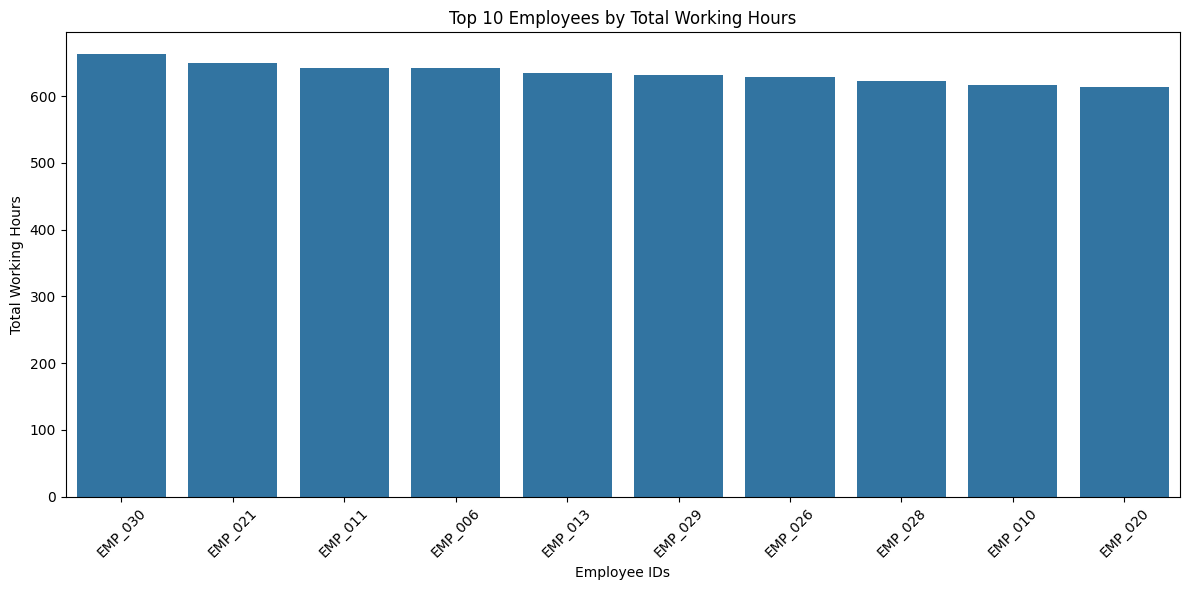

In [15]:
top10=total_hours.head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top10.index, y=top10.values)
plt.xticks(rotation=45)
plt.title("Top 10 Employees by Total Working Hours")
plt.xlabel("Employee IDs")
plt.ylabel("Total Working Hours")
plt.tight_layout()
plt.show()

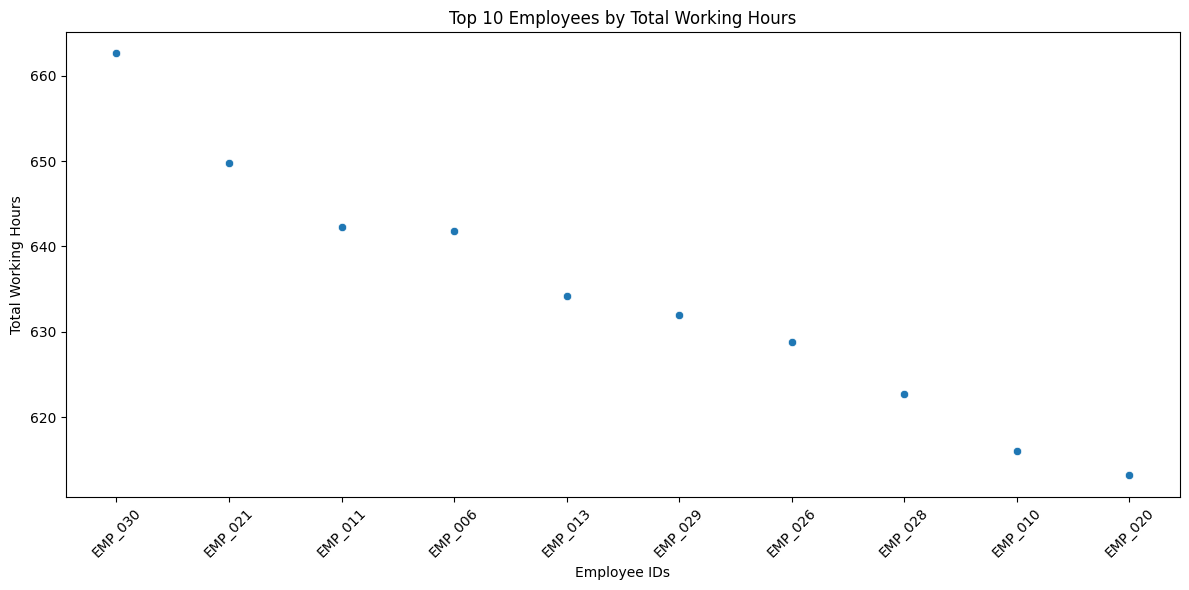

In [16]:
top10=total_hours.head(10)
plt.figure(figsize=(12,6))
sns.scatterplot(x=top10.index, y=top10.values)
plt.xticks(rotation=45)
plt.title("Top 10 Employees by Total Working Hours")
plt.xlabel("Employee IDs")
plt.ylabel("Total Working Hours")
plt.tight_layout()
plt.show()

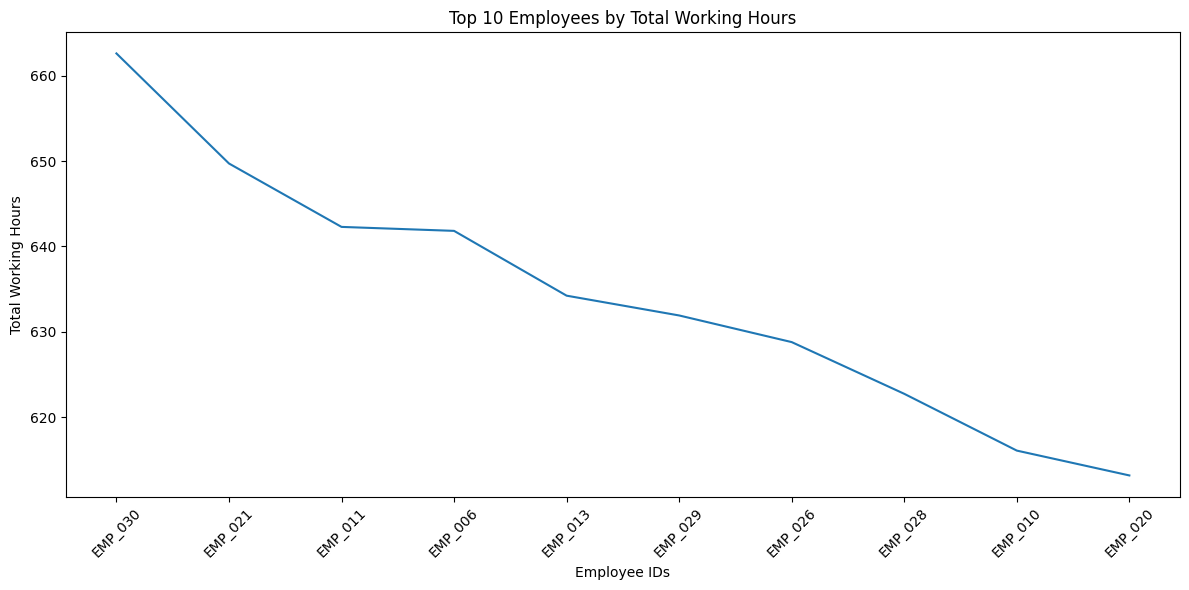

In [18]:
top10=total_hours.head(10)
plt.figure(figsize=(12,6))
sns.lineplot(x=top10.index, y=top10.values)
plt.xticks(rotation=45)
plt.title("Top 10 Employees by Total Working Hours")
plt.xlabel("Employee IDs")
plt.ylabel("Total Working Hours")
plt.tight_layout()
plt.show()